# Plotting RoboCupSimData

## About RoboCup
[RoboCup](https://www.robocup.org/) is an international scientific robot competition in which teams of multiple robots compete against each other. Its different leagues provide many sources of robotics data, that can be used for further analysis and application of machine learning.

## Objectives
Plotting spatiotemporal soccer data.

## Data
### Input
  * */data/output/groundtruth_cleaned.csv*: Spatiotemporal data of the ball and players.
    * *This file was generated in the project Cleaning RoboCupSimData*

### Output
  * */data/output/soccer_pitch.png*: Soccer pitch 
  * */data/output/initial_positions.png*: Soccer pitch with initial ball and player positions
  * */data/output/trajectories.png*: Soccer pitch with ball and goalkeeper trajectory 
  
## Sources
  * [FC Python: Drawing a Pitchmap – Adding Lines & Circles in Matplotlib](https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib)
  * [xyFootyPy](https://github.com/znstrider/xyFootyPy)


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib.animation import FuncAnimation
from IPython.display import display, Markdown as md

# Config
%matplotlib notebook
pd.options.display.max_columns = None

# Global
GRASS_COLOR = "#3CAF54"

In [2]:
# Reads the .csv file into a DataFrame
df = pd.read_csv("data/output/groundtruth_cleaned.csv", sep=";")

display(df.head())

,time,playmode,score_L,score_R,ball_pos_x,ball_pos_y,ball_vel_x,ball_vel_y,L_01_pos_x,L_01_pos_y,L_01_vel_x,L_01_vel_y,L_02_pos_x,L_02_pos_y,L_02_vel_x,L_02_vel_y,L_03_pos_x,L_03_pos_y,L_03_vel_x,L_03_vel_y,L_04_pos_x,L_04_pos_y,L_04_vel_x,L_04_vel_y,L_05_pos_x,L_05_pos_y,L_05_vel_x,L_05_vel_y,L_06_pos_x,L_06_pos_y,L_06_vel_x,L_06_vel_y,L_07_pos_x,L_07_pos_y,L_07_vel_x,L_07_vel_y,L_08_pos_x,L_08_pos_y,L_08_vel_x,L_08_vel_y,L_09_pos_x,L_09_pos_y,L_09_vel_x,L_09_vel_y,L_10_pos_x,L_10_pos_y,L_10_vel_x,L_10_vel_y,L_11_pos_x,L_11_pos_y,L_11_vel_x,L_11_vel_y,R_01_pos_x,R_01_pos_y,R_01_vel_x,R_01_vel_y,R_02_pos_x,R_02_pos_y,R_02_vel_x,R_02_vel_y,R_03_pos_x,R_03_pos_y,R_03_vel_x,R_03_vel_y,R_04_pos_x,R_04_pos_y,R_04_vel_x,R_04_vel_y,R_05_pos_x,R_05_pos_y,R_05_vel_x,R_05_vel_y,R_06_pos_x,R_06_pos_y,R_06_vel_x,R_06_vel_y,R_07_pos_x,R_07_pos_y,R_07_vel_x,R_07_vel_y,R_08_pos_x,R_08_pos_y,R_08_vel_x,R_08_vel_y,R_09_pos_x,R_09_pos_y,R_09_vel_x,R_09_vel_y,R_10_pos_x,R_10_pos_y,R_10_vel_x,R_10_vel_y,R_11_pos_x,R_11_pos_y,R_11_vel_x,R_11_vel_y
0,1,kick_off_l,0,0,52.5,34.0,0.0,0.0,3.5000,34.000000,0.000000,0.000000,40.0000,29.00000,0.000000,0.000000,40.0000,39.00000,0.000000,0.000000,40.90000,18.2000,0.000000,0.000000,40.9000,49.8000,0.000000,0.000000,45.80000,32.10001,0.000000,0.000000,42.50000,23.2000,0.000000,0.000000,42.50000,44.80000,0.000000,0.000000,52.000000,10.2000,0.000000,0.000000,52.000000,57.8000,0.000000,0.000000,52.115005,34.0,0.0,0.0,101.5000,34.000000,0.000000,0.000000,77.5000,39.0000,0.000000,0.000000,77.5000,29.00000,0.000000,0.000000,76.5000,52.0000,0.000000,0.000000,76.5000,16.0000,0.000000,0.000000,62.625,34.0,0.0,0.0,67.5000,43.00000,0.000000,0.000000,67.5000,25.00000,0.000000,0.000000,55.87090,57.5612,0.141205,-0.167007,55.5000,10.0000,0.000000,0.000000,62.02499,34.000000,0.000000,0.000000
1,2,kick_off_l,0,0,52.5,34.0,0.0,0.0,3.2529,33.914505,-0.088501,-0.030594,40.5023,29.39000,0.201004,0.156097,40.5095,38.69119,0.203796,-0.123505,40.90000,18.2000,0.000000,0.000000,41.0438,49.1568,0.046906,-0.209595,46.32471,32.13879,0.203995,0.015106,42.50000,23.2000,0.000000,0.000000,42.64639,44.30150,0.067200,-0.228699,51.828003,10.7672,-0.066101,0.217896,51.968307,57.2331,-0.012100,-0.215698,52.115005,34.0,0.0,0.0,101.1026,34.137100,-0.158905,0.054794,77.1085,39.1124,-0.134796,0.038696,77.1135,29.05040,-0.125900,0.016403,76.1369,51.9051,-0.117401,-0.030701,76.1542,16.1777,-0.122192,0.062805,62.625,34.0,0.0,0.0,67.1773,43.05850,-0.125504,0.022797,67.1253,24.97710,-0.171906,-0.010498,56.36160,56.9621,0.186707,-0.227997,55.9538,10.4232,0.174301,0.162598,61.94170,33.604507,-0.044998,-0.157806
2,3,kick_off_l,0,0,52.5,34.0,0.0,0.0,2.9360,33.824600,-0.113403,-0.032196,40.7050,29.54379,0.081101,0.061493,40.7095,38.56950,0.080002,-0.048706,41.45580,18.4107,0.191406,0.072495,41.0850,48.9421,0.013397,-0.069901,47.06090,32.20129,0.286194,0.024307,42.97749,23.4188,0.168701,0.077301,42.71179,44.07270,0.029999,-0.104996,51.603195,11.4833,-0.086304,0.275101,51.942795,57.0104,-0.009705,-0.084701,52.115005,34.0,0.0,0.0,100.5614,34.315903,-0.216507,0.071503,76.9685,39.1391,-0.048203,0.009201,76.6005,29.09930,-0.167099,0.015900,75.6355,51.7818,-0.162094,-0.039902,75.6841,16.4424,-0.166000,0.093506,62.625,34.0,0.0,0.0,66.7031,43.16240,-0.184402,0.040405,66.5807,24.90421,-0.249893,-0.033493,56.92101,56.3116,0.212906,-0.247604,56.4597,10.9683,0.194305,0.209396,61.90350,33.063995,0.000000,0.000000
3,4,kick_off_l,0,0,52.5,34.0,0.0,0.0,2.5962,33.733704,-0.121597,-0.032501,40.7786,29.60069,0.029495,0.022797,40.7869,38.52110,0.030899,-0.019302,42.28290,18.6924,0.284805,0.097000,41.5024,48.3509,0.136002,-0.192596,47.82829,32.22780,0.298401,0.010300,43.64090,23.7471,0.234299,0.115906,43.14301,43.77780,0.197800,-0.135300,51.320400,12.2341,-0.108597,0.288406,51.929596,56.9261,-0.005005,-0.032105,52.115005,34.0,0.0,0.0,99.9118,34.460800,-0.259903,0.057999,76.5370,39.1293,-0.148605,-0.003403,76.0334,29.13969,-0.184799,0.013199,75.0515,51.6612,-0.188904,-0.039002,75.

### Creating a soccer pitch
This function creates a soccer pitch plot with customizable lenghts.

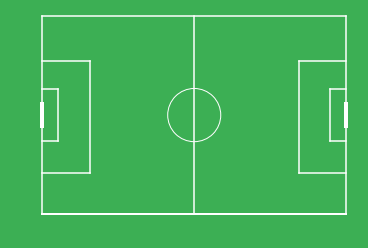

In [3]:
def create_pitch(ax, len_x=105, len_y=68, penalty_area_width=16.5, penalty_area_length=40, six_yard_box_width=5.5,
                six_yard_box_length=9, lines_colors="white"):
    # Pitch Outline & Centre Line
    plt.plot([0, 0], [0, len_y], color=lines_colors, zorder=0)
    plt.plot([0, len_x], [len_y, len_y], color=lines_colors, zorder=0)
    plt.plot([len_x, len_x], [len_y, 0], color=lines_colors, zorder=0)
    plt.plot([len_x, 0], [0, 0], linewidth=2, color=lines_colors, zorder=0)
    plt.plot([len_x/2, len_x/2], [0, len_y], color=lines_colors, zorder=0)
    plt.plot([0, 0], [(len_y/2) - 3.66, (len_y/2) + 3.66], linewidth=4, color=lines_colors, zorder=0)
    plt.plot([len_x, len_x], [(len_y/2) - 3.66, (len_y/2) + 3.66], linewidth=4, color=lines_colors, zorder=0)

    # Left Penalty Area
    plt.plot([penalty_area_width, penalty_area_width], [len_x/2, (len_y/2) - (penalty_area_length/2)],
             color=lines_colors, zorder=0)
    plt.plot([0, penalty_area_width], [len_x/2, len_x/2], color=lines_colors, zorder=0)
    plt.plot([penalty_area_width, 0], [(len_y/2) - (penalty_area_length/2), (len_y/2) - (penalty_area_length/2)],
             color=lines_colors, zorder=0)

    # Right Penalty Area
    plt.plot([len_x, len_x - penalty_area_width], [len_x/2, len_x/2], color=lines_colors, zorder=0)
    plt.plot([len_x - penalty_area_width, len_x - penalty_area_width], [len_x/2, (len_y/2) - (penalty_area_length/2)],
             color=lines_colors, zorder=0)
    plt.plot([len_x - penalty_area_width, len_x], [(len_y/2) - (penalty_area_length/2), (len_y/2) -
                                                   (penalty_area_length/2)], color=lines_colors, zorder=0)

    # Left 6-yard Box
    plt.plot([0, six_yard_box_width], [(len_y/2) + six_yard_box_length, (len_y/2) + six_yard_box_length],
             color=lines_colors, zorder=0)
    plt.plot([six_yard_box_width, six_yard_box_width], [(len_y/2) + six_yard_box_length, (len_y/2) -
                                                        six_yard_box_length], color=lines_colors, zorder=0)
    plt.plot([six_yard_box_width, 0], [(len_y/2) - six_yard_box_length, (len_y/2) - six_yard_box_length],
             color=lines_colors, zorder=0)

    # Right 6-yard Box
    plt.plot([len_x, len_x - six_yard_box_width], [(len_y/2) + six_yard_box_length, (len_y/2) + six_yard_box_length],
             color=lines_colors, zorder=0)
    plt.plot([len_x - six_yard_box_width, len_x - six_yard_box_width],
             [(len_y/2) + six_yard_box_length, (len_y/2) - six_yard_box_length], color=lines_colors, zorder=0)
    plt.plot([len_x - six_yard_box_width, len_x], [(len_y/2) - six_yard_box_length, (len_y/2) - six_yard_box_length],
             color=lines_colors, zorder=0)

    # Prepare Circles
    centreCircle = plt.Circle((len_x/2, len_y/2), 9.15, color=lines_colors, fill=False, zorder=0)

    # Draw Circles
    ax.add_patch(centreCircle)

    # Tidy Axes
    plt.axis('off')


# Create figure
fig = plt.figure(facecolor=GRASS_COLOR)
ax = fig.add_subplot(1, 1, 1)

create_pitch(ax)

# Display Pitch
plt.show()

# Save figure
fig.savefig("data/output/soccer_pitch.png", facecolor=GRASS_COLOR)

### Plotting positions
Here we plot the ball (*gray*) and players initial position (*R team in blue and L team in green*).

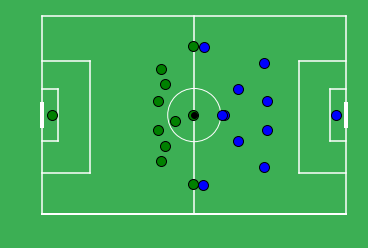

In [4]:
def plot_ball(ax, df, time_frames, color="black", alpha=1):
    time_filter = df["time"].isin(time_frames)    
    ax.scatter(df.loc[time_filter]["ball_pos_x"].values, df.loc[time_filter]["ball_pos_y"].values, color=color, alpha=alpha, 
               s=35) 

def plot_player(ax, df, team, player, time_frames, color="blue", alpha=1, linewidth=1, edgecolors="black", size=100):
    time_filter = df["time"].isin(time_frames)
    pos_x_column = "{team}_{player}_pos_x".format(team=team, player=str(player).zfill(2))
    pos_y_column = "{team}_{player}_pos_y".format(team=team, player=str(player).zfill(2))
    
    ax.scatter(df.loc[time_filter][pos_x_column].values, df.loc[time_filter][pos_y_column].values, color=color, alpha=alpha, 
              linewidths=linewidth, edgecolors=edgecolors, s=size)
    


# Create figure
fig = plt.figure(facecolor=GRASS_COLOR)
ax = fig.add_subplot(1, 1, 1)

create_pitch(ax)

time_frames = range(1,2) # Initial positions

colors = {"R": "blue", "L": "green"}

# Plot positions
for team in ["R", "L"]:
    for player in range(1,12):
        plot_player(ax, df, team, player, time_frames, color=colors[team])

        
plot_ball(ax, df, time_frames)


# Display Pitch
plt.show()

# Save figure
fig.savefig("data/output/initial_positions.png", facecolor=GRASS_COLOR)

### Plotting trajectories
Let's plot the ball (*green*) and a player (*blue*) trajectory over the full match *(from time 1 to 6000)*

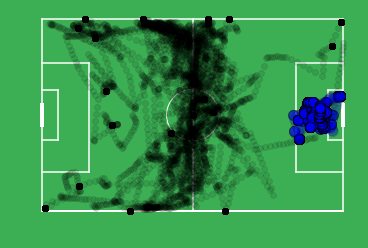

In [5]:
# Create figure
fig = plt.figure(facecolor=GRASS_COLOR)
ax = fig.add_subplot(1, 1, 1)

create_pitch(ax)

time_frames = range(1,6001) # Full match range

# Plot trajectories
plot_player(ax, df, "R", 1, time_frames, alpha=0.1) # Player '1' (goalkeeper) from team 'R'
plot_ball(ax, df, time_frames, alpha=0.1)

# Display Pitch
plt.show()

# Save figure
fig.savefig("data/output/trajectories.png", facecolor=GRASS_COLOR)